In [1]:
from  dataloader import *
from networks import *
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt

Device: cuda


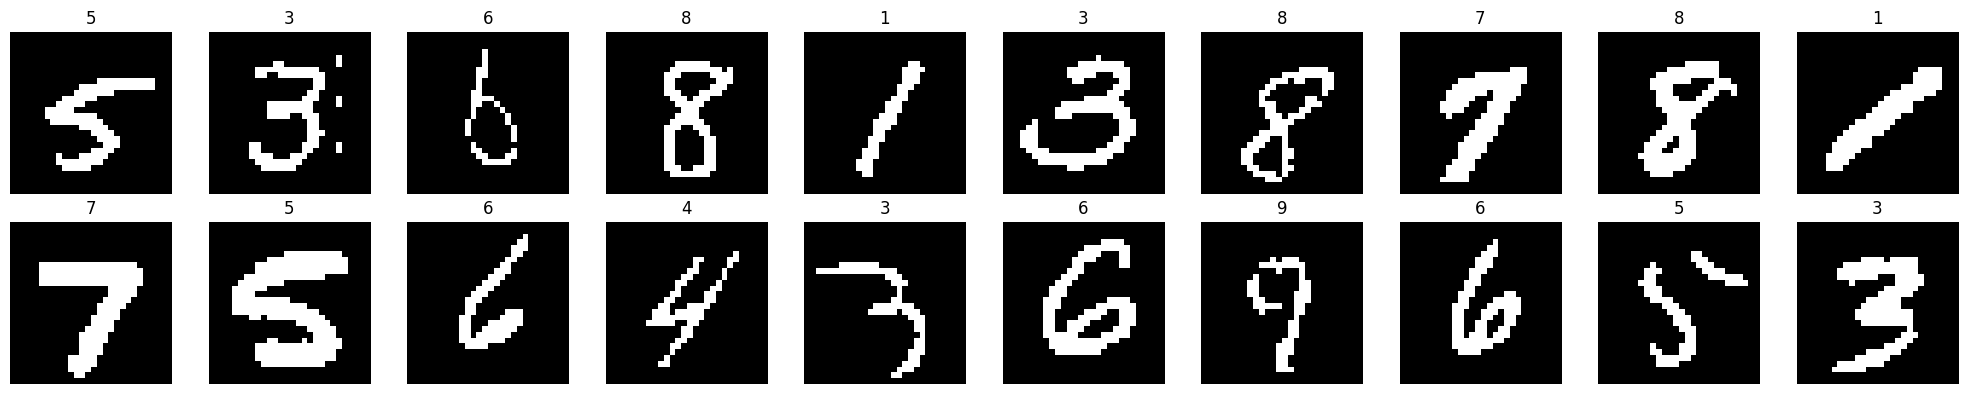

In [2]:
epochs     = 30
lr         = 1e-3
batch_size = 128

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Device:", device)


data = Dataloader(dataset="BiMNIST", batch_size=batch_size)
trainloader , testloader = data.get_loaders(visualize=True)

In [ ]:
if data.dataset == "BiMNIST":
    input_dim = 28*28
    hidden_layers = [8000, 8000]
    output_dim = 28*28


model = MADE(input_dim=input_dim, hidden_dims=hidden_layers, output_dim=output_dim).to(device)
optimizer = torch.optim.Adam(model.parameters(), lr=lr)

epoch_losses = []
for epoch in range(1, epochs + 1):
    model.train()
    train_loss = 0.0       
    train_losses = []
    
    for batch_idx, (data, _) in enumerate(trainloader):
        data = data.view(-1, 28*28).to(device)

        optimizer.zero_grad(set_to_none=True)
        output = model(data)
        loss = F.binary_cross_entropy_with_logits(output, data)

        loss.backward()
        optimizer.step()

        train_loss += loss.item()
        train_losses.append(loss.item())
    
    
    avg_train_loss = train_loss / len(trainloader)
    epoch_losses.append(avg_train_loss)
    
    if epoch % 5 == 0 or epoch == epochs:
        print(f"Epoch {epoch}, Train Loss: {avg_train_loss:.4f}")

Epoch 5, Train Loss: 0.1327
Epoch 10, Train Loss: 0.1181
Epoch 15, Train Loss: 0.1124
Epoch 20, Train Loss: 0.1094
Epoch 25, Train Loss: 0.1074
Epoch 30, Train Loss: 0.1061


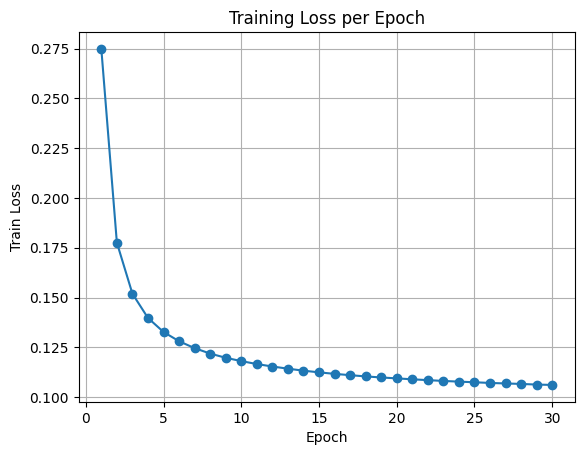

In [4]:
plt.figure()
plt.plot(range(1, len(epoch_losses) + 1), epoch_losses, marker="o")
plt.xlabel("Epoch")
plt.ylabel("Train Loss")
plt.title("Training Loss per Epoch")
plt.grid(True)
plt.show()

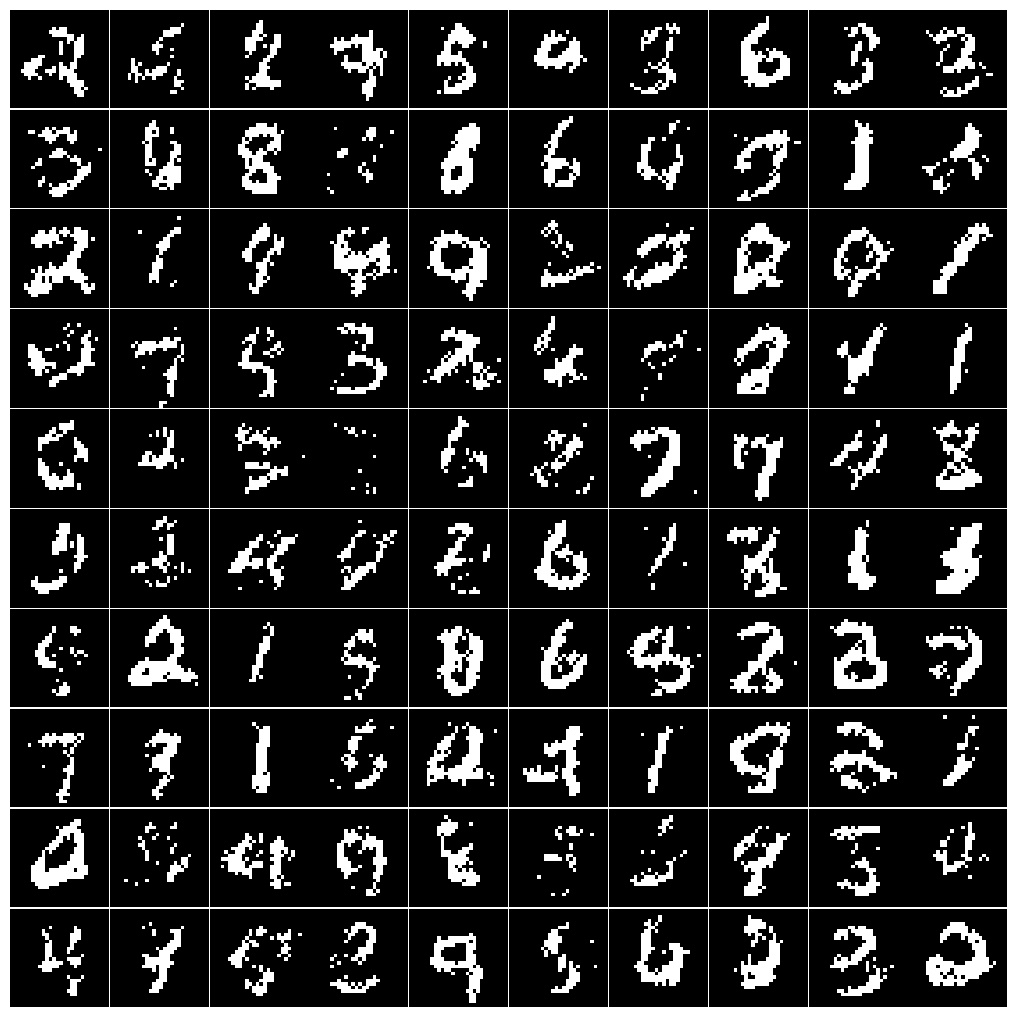

In [5]:
_ = model.sample(100, visualize=True)